In [2]:
import csv # csv 파일 처리 모듈

In [6]:
with open('data-files/seoul-temperature.csv', 'rt', encoding='utf-8') as f:
    reader = csv.reader(f) # csv 파일 처리기 만들기

    next(reader) # 한 행을 일고 다음 행으로 이동 (헤더를 읽어서 버리기)
    lines = []
    for line in reader:
        lines.append(line)

In [9]:
len(lines), lines[:5]

(40910,
 [['1907-10-01', '108', '13.5', '7.9', '20.7'],
  ['1907-10-02', '108', '16.2', '7.9', '22'],
  ['1907-10-03', '108', '16.2', '13.1', '21.3'],
  ['1907-10-04', '108', '16.5', '11.2', '22'],
  ['1907-10-05', '108', '17.6', '10.9', '25.4']])

In [23]:
# map(함수, 데이터) -> 데이터의 각 행에 함수를 적용해서 결과를 이터레이터로 반환
def to_float(x): # 'value'
    try:
        fx = float(x)
    except:
        fx = -1000
    return fx

data = list( filter(lambda line: len(line) == 5, lines) ) # 각 행별로 데이터의 갯수가 5개인 행만 포함
# list(  map(lambda line: to_float(line[4]), data) )
data = list( map( lambda line: line[:2] + \
                               list( map( lambda x: to_float(x), line[2:] ) ), \
                  data ) )

In [24]:
len(data), data[:3]

(40909,
 [['1907-10-01', '108', 13.5, 7.9, 20.7],
  ['1907-10-02', '108', 16.2, 7.9, 22.0],
  ['1907-10-03', '108', 16.2, 13.1, 21.3]])

In [25]:
# 가장 더웠던 날 ( 최고 기온이 가장 높았던 날) 및 온도

max_temperature = -1000
max_date = ''

for row in data:
    if row[4] > max_temperature:
        max_temperature = row[4] # 그날의 최고 온도
        max_date = row[0] # 날짜 

print(max_date, max_temperature)

2018-08-01 39.6


In [27]:
# 출생 이후 생일 중에서 가장 더웠던 날

birth_year = '1995'
birth_date = '03-01'
max_temperature = -1000
max_date = ''

for row in data:
    year = row[0][:4]
    date = row[0][5:]

    if birth_year <= year and birth_date == date: #출생 이후 생일 중에서
        if row[4] > max_temperature:
            max_temperature = row[4] # 그날의 최고 온도
            max_date = row[0] # 날짜 

print(max_date, max_temperature)

2007-03-01 15.3


In [30]:
# 월별로 데이터 구성 1 (월을 key로 하는 딕셔너리로 구성) --> { '01': [], '02: []}

data_by_month = {}

for idx, row in enumerate(data):
    month = row[0][5:7] # '2000-12-31' -> '12'
    # print(month)
    # if idx == 5: break
    if month in data_by_month:
        data_by_month[month].append(row)
    else:
        data_by_month[month] = [row]

data_by_month['01'][:5]

[['1908-01-01', '108', -5.9, -9.1, -1.3],
 ['1908-01-02', '108', -7.7, -13.9, -3.0],
 ['1908-01-03', '108', -6.2, -10.8, -2.9],
 ['1908-01-04', '108', -7.5, -12.8, -1.7],
 ['1908-01-05', '108', -4.8, -11.3, -0.1]]

In [31]:
# 월별로 데이터 구성 (월을 key로 하는 딕셔너리로 구성) --> { '01': [], '02: []}

from collections import defaultdict # 딕셔너리에 키가 없으면 자동으로 만들고 다음 처리 수행

data_by_month = defaultdict(list)

for idx, row in enumerate(data):
    month = row[0][5:7] # '2000-12-31' -> '12'
    data_by_month[month].append(row)
    
data_by_month['01'][:5]

[['1908-01-01', '108', -5.9, -9.1, -1.3],
 ['1908-01-02', '108', -7.7, -13.9, -3.0],
 ['1908-01-03', '108', -6.2, -10.8, -2.9],
 ['1908-01-04', '108', -7.5, -12.8, -1.7],
 ['1908-01-05', '108', -4.8, -11.3, -0.1]]

In [45]:
# [ true일때 선택되는 값 ] if 조건식 else [ false일 때 선택되는 값 ]
10 if len('hello') > 4 else 20

10

In [48]:
def mean_temperature_by_month(month, t='max'):

    month = "{0:02d}".format(month) # 8 -> "08"

    # 'mean' -> 2, 'min' -> 3, 'max' -> 4
    # idx = 2
    # if t == 'max':
    #     idx = 4
    # elif t == 'min':
    #     idx = 3
    # else:
    #     idx = 2

    idx = 2 if t == 'mean' else 3 if t == 'min' else 4

    total, cnt = 0, 0
    for row in data:
        if month == row[0][5:7]:
            total += row[idx]
            cnt += 1
    return total / cnt

def mean_temperature_by_month2(month, t='max'):

    month = "{0:02d}".format(month) # 8 -> "08"
    idx = 2 if t == 'mean' else 3 if t == 'min' else 4
    total = 0
    for row in data_by_month[month]:
        total += row[idx]

    return total / len(data_by_month[month])


mean_temperature_by_month2(8, t='mean')

16.31996512641674

In [54]:
# 1년 중 일교차가 가장 큰 달 (max - min) 평균

gap_by_month = []
for month in range(1, 13):
    mx = mean_temperature_by_month2(month, 'max')
    mn = mean_temperature_by_month2(month, 'min')
    gap_by_month.append(( month, (mx - mn) ))

# print( gap_by_month )
gap_by_month.sort(key=lambda x: x[1], reverse=True)
gap_by_month

[(5, 10.664141705069124),
 (4, 10.63273809523806),
 (10, 10.318184413359885),
 (6, 9.576666666666668),
 (3, 9.408006912442357),
 (9, 9.240596125186277),
 (11, 9.236428571428517),
 (2, 8.696334913112256),
 (1, 8.273041474654445),
 (12, 8.10822548173708),
 (8, 7.887852368497473),
 (7, 7.244210829493063)]

In [56]:
gap_by_month[0], gap_by_month[:1]

((5, 10.664141705069124), [(5, 10.664141705069124)])

In [60]:
def pop_per_age_by_region(region):
    """
    동네이름을 사용해서 연령별 인구데이터를 검색하는 함수
    """


    with open('data-files/age.csv', 'rt', encoding='utf-8') as f:
        reader = csv.reader(f)
        
        result = []
        for line in reader:
            if region in line[0]:
                result.append(line[:1] + [ int(x.replace(',', '')) for x in line[3:] ] )

    return result

In [77]:
result = pop_per_age_by_region('신촌')

In [78]:
# result
import matplotlib.pyplot as plt

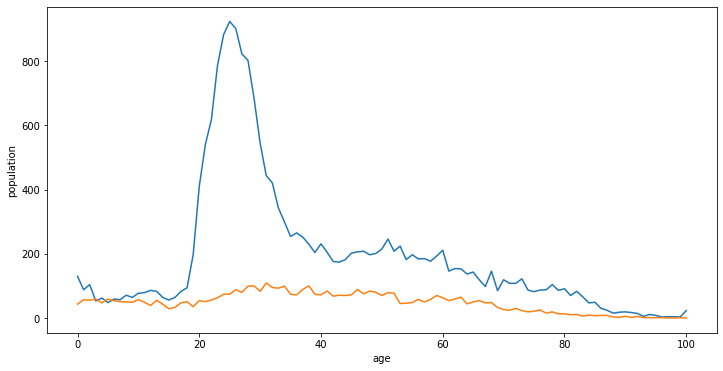

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(result[0][1:])
plt.plot(result[1][1:])
plt.xlabel('age')
plt.ylabel('population')
plt.show()

In [80]:
# age-with-gender.csv
# [ 행정구역, 전체인구통게, 남성인구통계, 여성인구통계]
# 지역명 -> 지역의 연령별, 성별 인구데이터 찾기
# 연령별 성비 도출

def pop_per_age_and_gender_by_region(region):
    """
    동네이름을 사용해서 연령별, 성별 인구데이터를 검색하는 함수
    """

    with open('data-files/age-with-gender.csv', 'rt', encoding='utf-8') as f:
        reader = csv.reader(f)
        
        result = []
        for line in reader:
            if region in line[0]:
                result.append([ line[0], # 행정구역명 
                                [ int(x.replace(',', '')) for x in line[106:207] ],     # 남성인구
                                [ int(x.replace(',', '')) for x in line[209:310] ] ])   # 여성인구

    return result

In [81]:
result = pop_per_age_and_gender_by_region('양평')

In [83]:
for x, y in zip([1, 2, 3], [4, 5, 6]):
    print(x, y)

1 4
2 5
3 6


In [87]:
# 남성 / (남성 + 여성), 여성 / (남성 + 여성)
ratio = []
for male, female in zip(result[0][1], result[0][2]):
    total = male + female
    if total == 0:
        ratio.append((0, 0))
    else:
        ratio.append( ( male / (male + female), female / (male + female) ) )

# ratio[:]

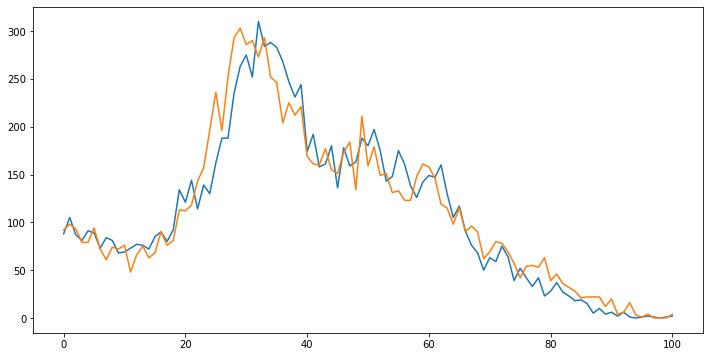

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(result[1][1])
plt.plot(result[1][2])
plt.show()

In [ ]:
# 유임승차비율이 가장 높은 역

# 승하차 인원이 가장 많은 역 (이용객이 가장 많은 역)

In [101]:
subway_data = []
with open('data-files/subwayfee.csv', 'rt', encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader) # 제목 행은 제거
    for line in reader:
        subway_data.append(line[:4] + \
                           [ int(x.replace(',', '')) for x in line[4:] ])

subway_data[:5]

[['Nov-20', '1호선', '1', '서울역', 970425, 919628, 163629, 153605],
 ['Nov-20', '1호선', '10', '동묘앞', 123243, 131205, 130264, 131631],
 ['Nov-20', '1호선', '2', '시청', 470299, 476546, 61681, 59054],
 ['Nov-20', '1호선', '3', '종각', 779391, 757727, 111601, 103762],
 ['Nov-20', '1호선', '4', '종로3가', 415759, 380983, 253486, 236161]]

In [102]:
for row in subway_data:
    total = row[4] + row[6]
    if total > 100000:
        if len(row) > 8:
            row[8] = round(row[4] / total, 2)
        else:
            row.append( round(row[4] / total, 2) )
    else:
        if len(row) > 8:
            row[8] = 0
        else:
            row.append( 0 )

In [103]:
subway_data[:10]

[['Nov-20', '1호선', '1', '서울역', 970425, 919628, 163629, 153605, 0.86],
 ['Nov-20', '1호선', '10', '동묘앞', 123243, 131205, 130264, 131631, 0.49],
 ['Nov-20', '1호선', '2', '시청', 470299, 476546, 61681, 59054, 0.88],
 ['Nov-20', '1호선', '3', '종각', 779391, 757727, 111601, 103762, 0.87],
 ['Nov-20', '1호선', '4', '종로3가', 415759, 380983, 253486, 236161, 0.62],
 ['Nov-20', '1호선', '5', '종로5가', 342225, 351197, 205830, 197086, 0.62],
 ['Nov-20', '1호선', '6', '동대문', 209906, 213469, 106156, 108389, 0.66],
 ['Nov-20', '1호선', '7', '신설동', 263272, 252254, 100228, 93219, 0.72],
 ['Nov-20', '1호선', '8', '제기동', 223204, 216130, 240998, 257699, 0.48],
 ['Nov-20', '1호선', '9', '청량리(서울시립대입구)', 320602, 315752, 238000, 240168, 0.57]]

In [109]:
subway_data.sort(key=lambda row: row[8], reverse=True)

In [110]:
subway_data[:10]

[['Nov-20', '경부선', '121', '서울역', 145486, 37641, 8385, 1930, 0.95],
 ['Nov-20',
  '공항철도 1호선',
  '644',
  '마곡나루(서울식물원)',
  173255,
  166982,
  9365,
  9389,
  0.95],
 ['Nov-20', '2호선', '19', '한양대', 193058, 210112, 11357, 11982, 0.94],
 ['Nov-20', '2호선', '49', '홍대입구', 1306396, 1406694, 81110, 78081, 0.94],
 ['Nov-20', '9호선', '616', '여의도', 524073, 504168, 34742, 32231, 0.94],
 ['Nov-20', '9호선', '626', '신논현', 746935, 759289, 50327, 47134, 0.94],
 ['Nov-20', '공항철도 1호선', '642', '홍대입구', 221472, 228513, 14031, 13211, 0.94],
 ['Nov-20', '공항철도 1호선', '643', '디지털미디어시티', 313729, 280132, 19303, 18019, 0.94],
 ['Nov-20', '공항철도 1호선', '645', '김포공항', 301497, 169301, 19268, 12768, 0.94],
 ['Nov-20', '공항철도 1호선', '648', '청라국제도시', 155921, 145232, 9657, 9350, 0.94]]

In [111]:
for row in subway_data:
    if len(row) > 9:
        row[9] = sum(row[4:8])
    else:
        row.append( sum(row[4:8]) )    

In [113]:

subway_data.sort(key=lambda row: row[9], reverse=True)

In [115]:
subway_data[:10]

[['Nov-20',
  '2호선',
  '32',
  '강남',
  2019373,
  2046712,
  144790,
  129444,
  0.93,
  4340319],
 ['Nov-20',
  '2호선',
  '26',
  '잠실(송파구청)',
  1604232,
  1593912,
  148702,
  142275,
  0.92,
  3489121],
 ['Nov-20',
  '2호선',
  '40',
  '신림',
  1494668,
  1430345,
  185327,
  187900,
  0.89,
  3298240],
 ['Nov-20',
  '2호선',
  '42',
  '구로디지털단지',
  1418737,
  1418268,
  137282,
  139421,
  0.91,
  3113708],
 ['Nov-20',
  '2호선',
  '49',
  '홍대입구',
  1306396,
  1406694,
  81110,
  78081,
  0.94,
  2872281],
 ['Nov-20',
  '2호선',
  '29',
  '삼성(무역센터)',
  1201492,
  1236299,
  92887,
  85746,
  0.93,
  2616424],
 ['Nov-20',
  '2호선',
  '44',
  '신도림',
  1149172,
  1139108,
  160860,
  151174,
  0.88,
  2600314],
 ['Nov-20',
  '2호선',
  '30',
  '선릉',
  1178665,
  1057066,
  178261,
  159007,
  0.87,
  2572999],
 ['Nov-20',
  '2호선',
  '31',
  '역삼',
  1053138,
  1175501,
  125579,
  126605,
  0.89,
  2480823],
 ['Nov-20',
  '2호선',
  '38',
  '서울대입구(관악구청)',
  1103420,
  1071620,
  151581,
  143923,
  0.8

In [ ]:
# subwaytime.csv 파일 사용

# 지하철 시간대별 이용 현황 전처리

# 출근 시간대 (7 ~ 9) 승하차 승객이 가장 많은 역

# 23시 최대 이용역

# 시간대별 승하차 인원이 가장 많은 역

# 시간대별 전체 이용고객 수